## [SECTION 0]

**Importing modules and setting up random seed**

In [1]:
import utils
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
plt.rcParams.update({'font.size': 20})

In [2]:
ID = 1055717
np.random.seed(ID)
seed = 42

## [SECTION 1]

**Loading data and splitting into train, validation and test subsets**

In [3]:
# load data and labels from csv table containing interpolated spectra of type 1, 2 and intermediate
df = pd.read_csv('table_data_final.csv')
data = df.loc[:, df.columns != 'labels']
data_labels = df['labels']
columns_wave = df.columns[:-1]

# converts data and labels pandasdataframe into numpy arrays
data = data.to_numpy()
data_labels = data_labels.to_numpy()

# check number of samples for every label
sample_labels, sample_freqs = np.unique(data_labels, return_counts=True)
print("Labels in dataset: ", sample_labels)
print("Frequencies in dataset: ", sample_freqs)

Labels in dataset:  [1. 2. 3.]
Frequencies in dataset:  [ 680 2145  521]


In [4]:
# splitting dataset into train, validation and test sets
X_train, y_train, X_validation, y_validation, X_test, y_test = utils.subset_creation(data, data_labels)

# check if every label is present in the training set
labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [1. 2. 3.]
Frequencies in training dataset:  [ 441 1370  330]


## [SECTION 1.1]

**Data preprocessing: feature scaling and mean normalization**

In [5]:
# Preprocessing: feature scaling and mean normalization
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_validation)

array([[-0.35060674, -0.42395674, -0.34463865, ..., -0.02792168,
        -0.05764491,  0.00738058],
       [-0.65996694, -0.69750408, -0.60430393, ..., -0.00198203,
        -0.04393429, -0.0377732 ],
       [-0.34952506, -0.56237829, -0.51324076, ...,  0.0374078 ,
         0.08157065, -0.01369119],
       ...,
       [-0.33384071, -0.36858812, -0.35185158, ..., -0.05674352,
        -0.05975424, -0.04279029],
       [ 0.64399715,  0.67748328,  0.32345848, ..., -0.00294276,
         0.02461883, -0.00967752],
       [-0.45661128, -0.35079107, -0.43209536, ..., -0.02888241,
        -0.05131693, -0.04680396]])

## [SECTION 1.2]

**Hyperparameters optimization**

In [11]:
# Hyperparameters optimization with random search. (Impiega svariati minuti)

parameters={'C': scipy.stats.uniform(scale=10**5), 'gamma': scipy.stats.uniform(scale=10**5),
            'kernel': ['linear', 'rbf'], 'class_weight':['balanced', None]}

hyperparam_clf = svm.SVC(C=parameters['C'], kernel=parameters['kernel'], gamma=parameters['gamma'],
                         class_weight=parameters['class_weight'])

best_param, CVresults = utils.randomsearch_cv(parameters, hyperparam_clf, X_train, y_train, num_iter=68)

Best parameters set found:  {'C': 16706.82638676293, 'class_weight': None, 'gamma': 62599.3270874258, 'kernel': 'linear'}


## [SECTION 2]

**SVM classification with various kernels**

**LINEAR KERNEL**

In [6]:
# 'linear' kernel
con_mat, norm_con_mat, SVM_clf_lin, predictions = utils.SVM_clf(X_train, y_train,
                                                                X_validation, y_validation,
                                                                clf_C=0.07, weights='balanced')

Results for linear kernel: 
 

Training error: 0.039701
Validation error: 0.054206 
 

Labels and frequencies in test set:  [107 352  76] 

Accuracy score on validation:  0.9457943925233645 

Balanced accuracy on validation:  0.9140749601275916 

Confusion matrix SVM  
 
 [[107   0   0]
 [  1 340  11]
 [  1  16  59]] 

Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.  ]
 [0.   0.97 0.03]
 [0.01 0.21 0.78]]


**RBF KERNEL**

In [6]:
# 'rbf' kernel
con_mat, norm_con_mat, SVM_clf_rbf = utils.SVM_clf(X_train, y_train, X_validation, y_validation, clf_C=34, clf_gamma=0.003,
                                     clf_kernel='rbf')

Results for rbf kernel: 
 

Training error: 0.019755
Validation error: 0.048964 
 

Labels and frequencies in test set:  [116 332  83] 

Accuracy score on validation:  0.9510357815442562 

Balanced accuracy on validation:  0.9226907630522089 

Confusion matrix SVM  
 
 [[116   0   0]
 [  0 323   9]
 [  1  16  66]] 

Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.  ]
 [0.   0.97 0.03]
 [0.01 0.19 0.8 ]]


**DEGREE 2 POLYNOMIAL**

In [18]:
# 'poly2' kernel
con_mat, norm_con_mat, SVM_clf_poly2 = utils.SVM_clf(X_train, y_train, X_validation, y_validation, clf_C=34, clf_gamma=0.003,
                                     clf_kernel='poly', clf_degree=2)

Results for poly kernel: 
 

Training error: 0.014012
Validation error: 0.063551 
 

Labels and frequencies in test set:  [114 338  83] 

Accuracy score on validation:  0.9364485981308411 

Balanced accuracy on validation:  0.9281731931358778 

Confusion matrix SVM  
 
 [[113   0   1]
 [  0 317  21]
 [  0  12  71]] 

Confusion matrix SVM (normalized)   
 
 [[0.99 0.   0.01]
 [0.   0.94 0.06]
 [0.   0.14 0.86]]


**DEGREE 3 POLYNOMIAL**

In [19]:
# 'poly3' degree
con_mat, norm_con_mat, SVM_clf_poly3 = utils.SVM_clf(X_train, y_train, X_validation, y_validation, clf_C=34, clf_gamma=0.003,
                                     clf_kernel='poly', clf_degree=3)

Results for poly kernel: 
 

Training error: 0.002802
Validation error: 0.072897 
 

Labels and frequencies in test set:  [114 338  83] 

Accuracy score on validation:  0.9271028037383178 

Balanced accuracy on validation:  0.9141526137770223 

Confusion matrix SVM  
 
 [[113   0   1]
 [  0 315  23]
 [  1  14  68]] 

Confusion matrix SVM (normalized)   
 
 [[0.99 0.   0.01]
 [0.   0.93 0.07]
 [0.01 0.17 0.82]]


## [SECTION 2.1]

**Saliency map**

In [33]:
for i in range(len(y_validation)):
    if y_validation[i]==3 and class_prob[i,0]>0.50:
        print(i)
        break
    else:
        pass

159


In [34]:
# saliency map for linear SVM
i_th_sample = 159
saliency_map, class_prob = utils.saliency_map(SVM_clf_lin, X_validation, i_th_sample, 3)

In [35]:
print("Prediction probability for", i_th_sample, "sample in validation: \n")
print("[Type 1, Type 2, Intermediate] \n")
print(class_prob[i_th_sample], "\n")
print("Ground truth for" , i_th_sample, "sample in validation subset: ", y_validation[i_th_sample])

Prediction probability for 159 sample in validation: 

[Type 1, Type 2, Intermediate] 

[0.59 0.03 0.38] 

Ground truth for 159 sample in validation subset:  3.0


In [36]:
# Color coding
color_codes = utils.color_coding(saliency_map, 3)

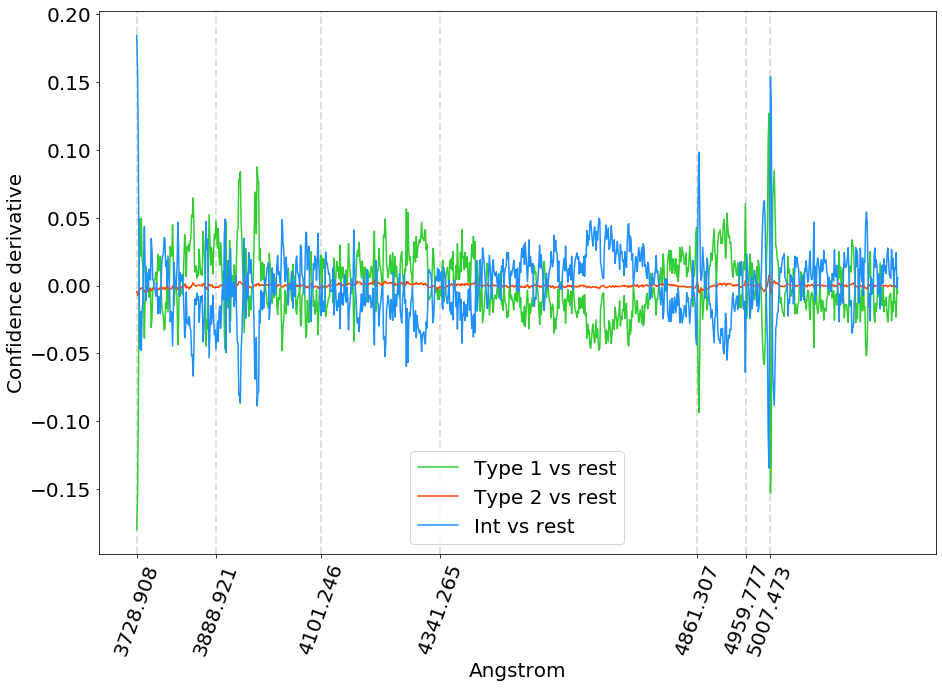

In [37]:
# saliency map for every class

plt.figure(figsize=(15,10))
plt.plot(columns_wave, saliency_map[0], c='limegreen', label='Type 1 vs rest')
plt.plot(columns_wave, saliency_map[1], c='orangered', label='Type 2 vs rest')
plt.plot(columns_wave, saliency_map[2], c='dodgerblue', label='Int vs rest')
plt.grid(axis='x', linestyle='--', linewidth=2, alpha=0.4)
# i punti indicati in x sono (da destra): h beta, gamma, delta, zeta
plt.xticks([0, 104, 242, 398, 736, 800, 831], rotation=70)
plt.xlabel('Angstrom')
plt.ylabel('Confidence derivative')
plt.legend()
#plt.savefig('saliency_maps/type2_goodclassification/type2_sal.pdf')
plt.show()

([<matplotlib.axis.XTick at 0x7f013ff673c8>,
 <a list of 7 Text xticklabel objects>)

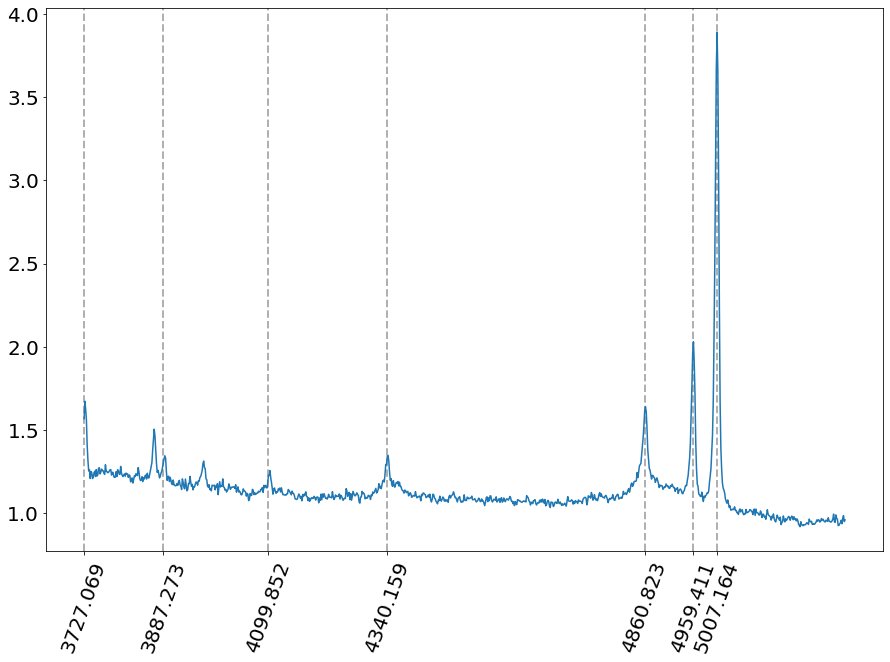

In [33]:
plt.figure(figsize=(15,10))
plt.plot(columns_wave, X_validation[262,:])
plt.grid(axis='x', linestyle='--', linewidth=2)
plt.xticks([0, 104, 242, 398, 736, 800, 831], rotation=70)

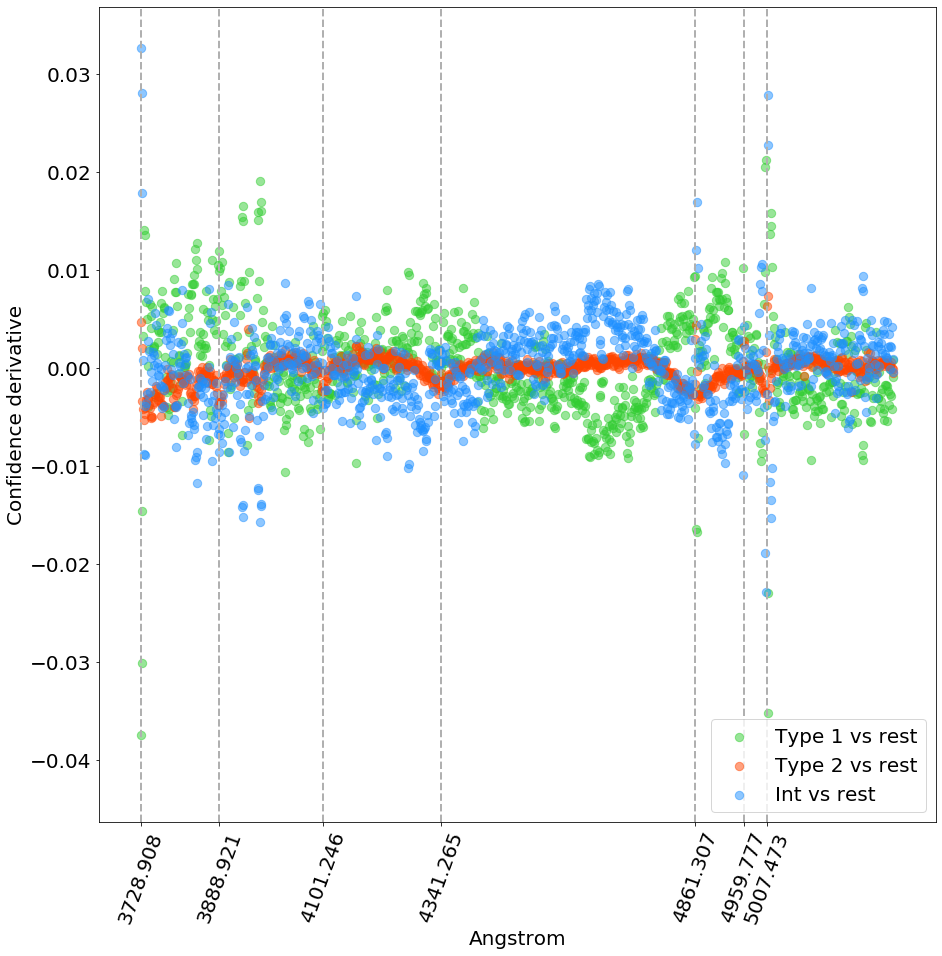

In [32]:
# saliency map scatter plot for every class

plt.figure(figsize=(15,15))
plt.scatter(columns_wave, saliency_map[0], c='limegreen', alpha=0.5, marker='o', s=70, label='Type 1 vs rest')
plt.scatter(columns_wave, saliency_map[1], c='orangered', alpha=0.5, marker='o', s=70, label='Type 2 vs rest')
plt.scatter(columns_wave, saliency_map[2], c='dodgerblue', alpha=0.5, marker='o', s=70, label='Int vs rest')
plt.grid(axis='x', linestyle='--', linewidth=2)
# i punti indicati in x sono (da destra): h beta, gamma, delta, zeta
plt.xticks([0, 104, 242, 398, 736, 800, 831], rotation=70)
plt.xlabel('Angstrom')
plt.ylabel('Confidence derivative')
plt.legend()
#plt.savefig('saliency_maps/good_classification/type1_sal_good.pdf')
plt.show()

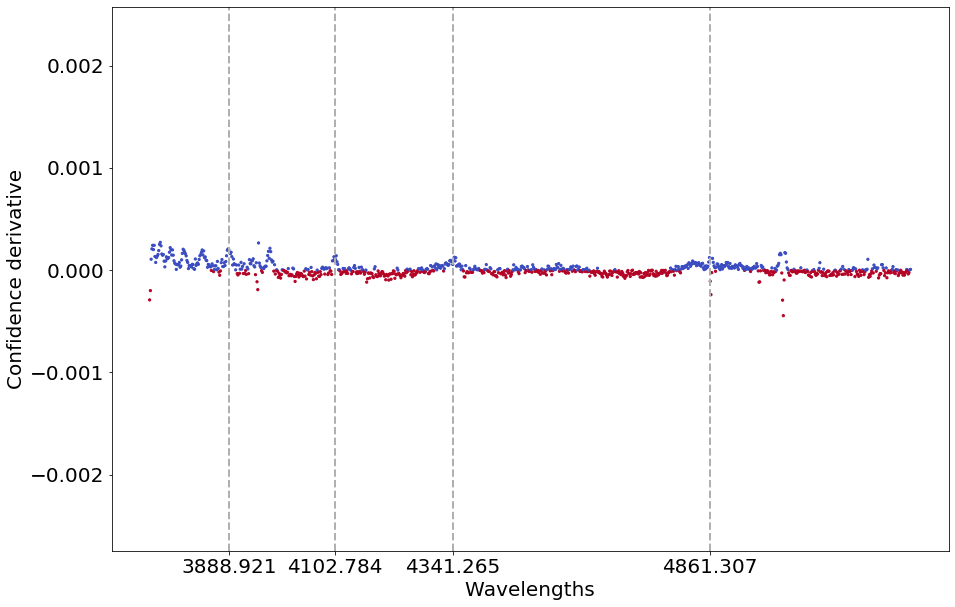

In [50]:
# color coding for type 1 vs rest 

plt.figure(figsize=(15,10))
plt.scatter(columns_wave, saliency_map[0], c=color_codes[0], cmap='coolwarm', s=5)
plt.grid(axis='x', linestyle='--', linewidth=2)
# i punti indicati in x sono (da destra): h beta, gamma, delta, zeta
plt.xticks([104, 243, 398, 736])
plt.xlabel('Wavelengths')
plt.ylabel('Confidence derivative')
#plt.legend()
plt.show()

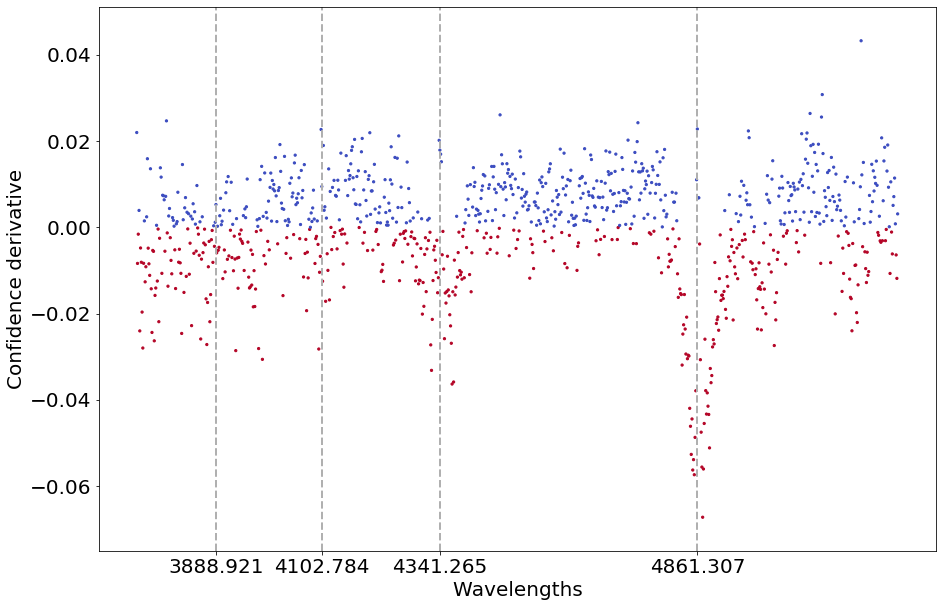

In [51]:
# color coding for type 2 vs rest

plt.figure(figsize=(15,10))
plt.scatter(columns_wave, saliency_map[1], c=color_codes[1], cmap='coolwarm', s=5)
plt.grid(axis='x', linestyle='--', linewidth=2)
# i punti indicati in x sono (da destra): h beta, gamma, delta, zeta
plt.xticks([104, 243, 398, 736])
plt.xlabel('Wavelengths')
plt.ylabel('Confidence derivative')
#plt.legend()
plt.show()

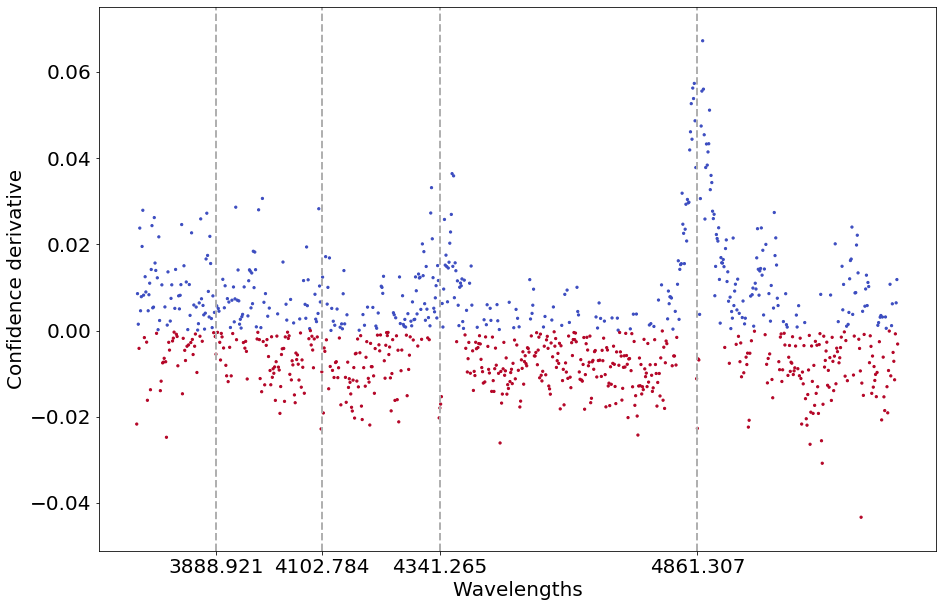

In [52]:
# color coding for type int vs rest

plt.figure(figsize=(15,10))
plt.scatter(columns_wave, saliency_map[2], c=color_codes[2], cmap='coolwarm', s=5)
plt.grid(axis='x', linestyle='--', linewidth=2)
# i punti indicati in x sono (da destra): h beta, gamma, delta, zeta
plt.xticks([104, 243, 398, 736])
plt.xlabel('Wavelengths')
plt.ylabel('Confidence derivative')
#plt.legend()
plt.show()

## [SECTION 3]

**t-SNE dimensionality reduction**

## [SECTION 3.1]

**t-SNE for type 1 and type 2 AGN**

In [4]:
# load data and labels from csv table containing interpolated spectra of only type 1 and 2

df = pd.read_csv('table_data_type_1_and_2.csv')
data = df.loc[:, df.columns != 'labels']
data_labels = df['labels']

# converts data and labels pandasdataframe into numpy arrays
data = data.to_numpy()
data_labels = data_labels.to_numpy()

In [5]:
# used only for t-sne

# Feature scaling and mean normalization. WRONG implementation, allows information leaks in classification.
# This can be used only for t-SNE, but is not strictly required.

for i in range(data.shape[1]):
    average = np.mean(data[:,i])
    stddev = np.std(data[:,i])
    for j in range(data.shape[0]):
        data[j,i] = np.around((data[j,i]-average)/stddev, decimals=3)

In [14]:
# t-SNE dimensionality reduction

X_embedded = utils.TSNE_dim_reduction(data, perp=50, components=2)

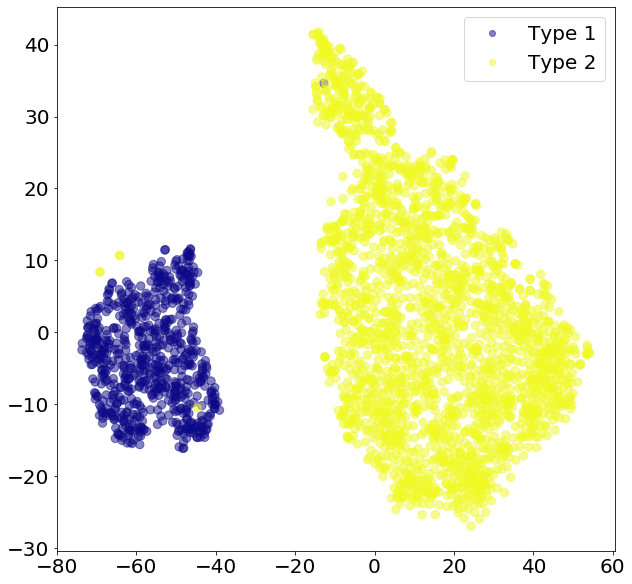

In [15]:
# Only type 1 and type 2

plt.figure(figsize=(10,10))

agn_classes = ['Type 1', 'Type 2']

scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data_labels, cmap='plasma', alpha=0.5,
                      marker='o', s=70)
plt.legend(handles=scatter.legend_elements()[0], labels=agn_classes)

# Save figure
#plt.savefig('tsne_figures/tSNE_perp40.pdf')

## [SECTION 3.2]

**t-SNE for whole dataset**

In [41]:
# re-load data and labels for t-SNE

df = pd.read_csv('table_data_final.csv')

# divide data in type 1, 2 and intermediate to get same colors in t-SNE plots
s1_data = df.loc[:679, df.columns != 'labels']
s2_data = df.loc[680:2824, df.columns != 'labels']
int_data = df.loc[2825:, df.columns != 'labels']

# same for labels
data_targets = df['labels']
s1_labels = data_targets[:680]
s2_labels = data_targets[680:2825]
int_labels = data_targets[2825:]
s1_labels = s1_labels - 1
int_labels = int_labels - 2

# stack single data an labels type
data_labels = np.hstack((s1_labels, np.hstack((int_labels, s2_labels))))
data = np.vstack((s1_data, np.vstack((int_data, s2_data))))

In [6]:
# used only for t-sne

# Feature scaling and mean normalization. WRONG implementation, allows information leaks in classification.
# This can be used only for t-SNE, but is not strictly required.

for i in range(data.shape[1]):
    average = np.mean(data[:,i])
    stddev = np.std(data[:,i])
    for j in range(data.shape[0]):
        data[j,i] = np.around((data[j,i]-average)/stddev, decimals=3)

In [8]:
# t-SNE dimensionality reduction

X_embedded = utils.TSNE_dim_reduction(data, perp=50, components=2)

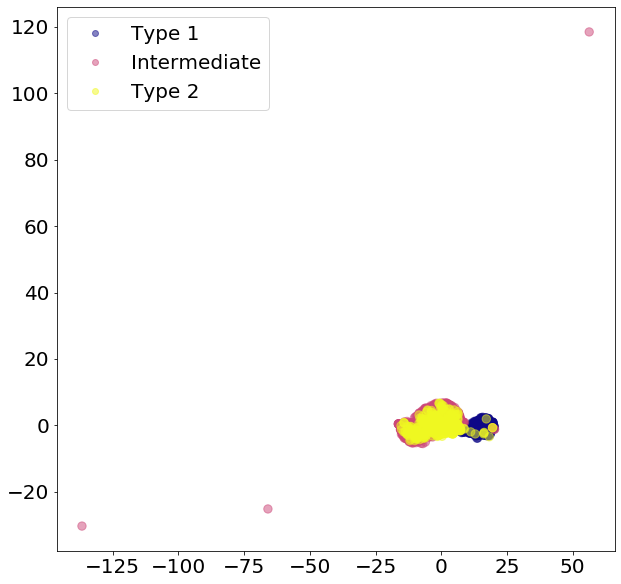

In [9]:
# For whole dataset

plt.figure(figsize=(10,10))

agn_classes = ['Type 1', 'Intermediate', 'Type 2']

scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data_labels, cmap='plasma', alpha=0.5,
                      marker='o', s=70)
plt.legend(handles=scatter.legend_elements()[0], labels=agn_classes)

# Save figure
#plt.savefig('tsne_figures/tSNE_perp50_complete_dataset.pdf')

In [15]:
test_swag = np.where(np.logical_and(X_embedded>=-40, X_embedded<=-37))

In [18]:
print(test_swag)

(array([100, 114, 122, 158, 163, 171, 174, 207, 211, 218, 226, 228, 235,
       238, 242, 248, 249, 251, 261, 262, 269, 275, 281, 282, 283, 293,
       308, 311, 314, 322, 333, 346, 347, 356, 363, 377, 414, 417, 441,
       442, 469, 471, 474, 511, 521, 538, 556, 559, 561, 565, 570]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0]))


In [34]:
print(X_embedded[226])

[-38.909748  -15.7291565]


In [36]:
columns_wave = df.columns[:-1]

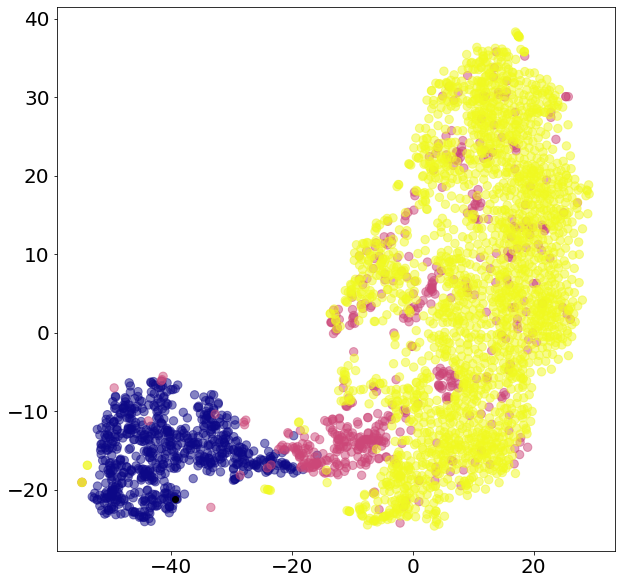

In [39]:
# For whole dataset

plt.figure(figsize=(10,10))

agn_classes = ['Type 1', 'Intermediate', 'Type 2']

scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data_labels, cmap='plasma', alpha=0.5,
                      marker='o', s=70)
scatter = plt.scatter(X_embedded[174,0], X_embedded[174,1], c='black')
#plt.legend(handles=scatter.legend_elements()[0], labels=agn_classes)

([], <a list of 0 Text xticklabel objects>)

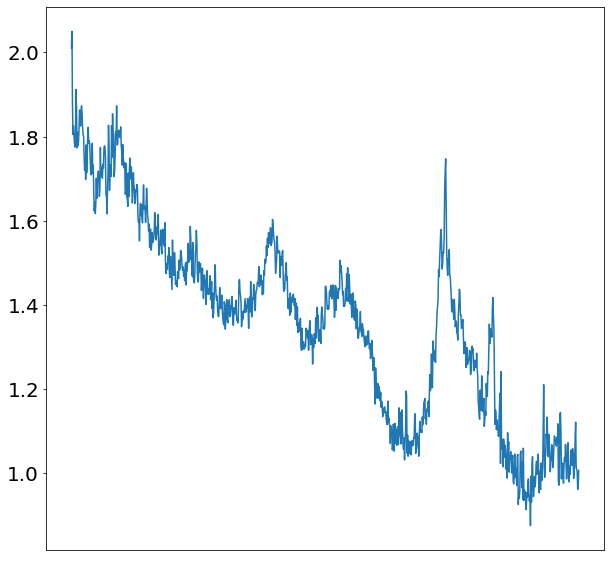

In [48]:
plt.figure(figsize=(10,10))
plt.plot(columns_wave, data[163])
plt.xticks([])

In [50]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7f1380b53048>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7f1380b53a90>)

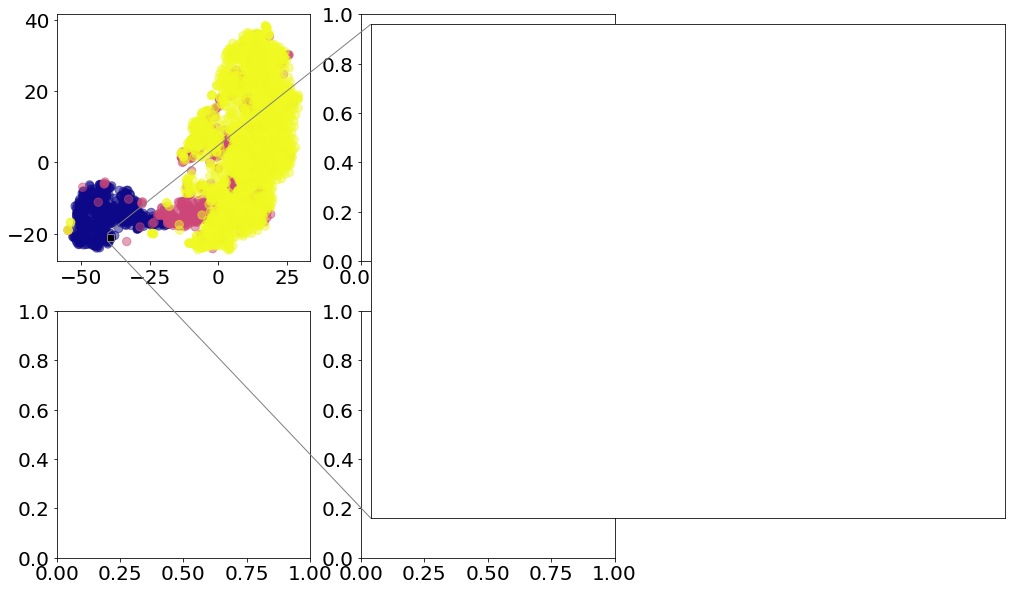

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

scatter = ax[0,0].scatter(X_embedded[:,0], X_embedded[:,1], c=data_labels, cmap='plasma', alpha=0.5, marker='o', s=70)
ax[0,0].scatter(X_embedded[174,0], X_embedded[174,1], c='black')
#plt.legend(handles=scatter.legend_elements()[0], labels=agn_classes)

axins = zoomed_inset_axes(ax[0,1], 1, loc=2)
axins.plot(columns_wave, data[163])

x1, x2, y1, y2 = -40.5, -38, -22, -20
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.yticks([])
plt.xticks([])
mark_inset(ax[0,0], axins, loc1=2, loc2=3, fc="none", ec="0.5")

## [SECTION 3.3]

**SVM classification over cembedded components from t-SNE**

(ANCORA DA COMPLETARE)

In [7]:
# preparing training, validation and test sets for data embedded with t-SNE

m_test = (len(X_embedded)*20)/100
m_validation = int(((len(X_embedded) - m_test)*20)/100)
m_train = int(len(X_embedded) - m_test - m_validation)

# random permutation
permutation = np.random.permutation(X_embedded.shape[0])

X_embedded = X_embedded[permutation]
data_labels = data_labels[permutation]

# features
X_train = X_embedded[:m_train]
X_validation = X_embedded[m_train:(m_validation+m_train)]
X_test = X_embedded[(m_validation+m_train):]

# labels
y_train = data_labels[:m_train]
y_validation = data_labels[m_train:(m_validation+m_train)]
y_test = data_labels[(m_validation+m_train):]

In [8]:
# check if every label is present in the training set

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [1. 2. 3.]
Frequencies in training dataset:  [ 447 1360  334]


In [9]:
# 'rbf' kernel
con_mat, norm_con_mat, SVM_clf_rbf_emb = utils.SVM_clf(X_train, y_train, X_validation, y_validation,
                                                       clf_C=37.07880344704095,
                                                       clf_gamma=0.005222946704501404, clf_kernel='rbf')

Results for rbf kernel: 
 

Training error: 0.141056
Validation error: 0.158879 
 

Labels and frequencies in test set:  [113 340  82] 

Accuracy score on validation:  0.8411214953271028 

Balanced accuracy on validation:  0.822157751509842 

Confusion matrix SVM  
 
 [[112   0   1]
 [  0 286  54]
 [  0  30  52]] 

Confusion matrix SVM (normalized)   
 
 [[0.99 0.   0.01]
 [0.   0.84 0.16]
 [0.   0.37 0.63]]


## [SECTION 4]

**Contour plots**

In [ ]:
# re-load data and labels for contour plots
df = pd.read_csv('table_data_final.csv')
data = df.loc[:, df.columns != 'labels']
data_labels = df['labels']
columns_wave = df.columns[:-1]

# converts data and labels pandasdataframe into numpy arrays
data = data.to_numpy()
data_labels = data_labels.to_numpy()

# check number of samples for every label
sample_labels, sample_freqs = np.unique(data_labels, return_counts=True)
print("Labels in dataset: ", sample_labels)
print("Frequencies in dataset: ", sample_freqs)

In [ ]:
# used only for t-sne

# Feature scaling and mean normalization. WRONG implementation, allows information leaks in classification.
# This can be used only for t-SNE, but is not strictly required.

for i in range(data.shape[1]):
    average = np.mean(data[:,i])
    stddev = np.std(data[:,i])
    for j in range(data.shape[0]):
        data[j,i] = np.around((data[j,i]-average)/stddev, decimals=3)

No handles with labels found to put in legend.


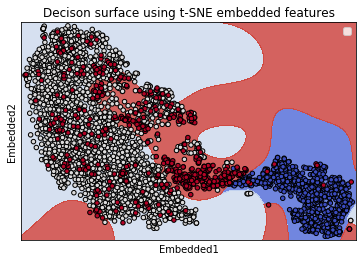

In [5]:
# Contour plot of rbf SVM over embedded features from t-SNE

X = data  
y = data_labels

agn_classes = ['Type 1', 'Type 2', 'Intermediate']

Xreduced = utils.TSNE_dim_reduction(data, data_labels, perp=50, components=2)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='rbf', C=37.07880344704095, gamma=0.005222946704501404,
                class_weight='balanced', probability=True)
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of rbf SVC')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Embedded2')
ax.set_xlabel('Embedded1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using t-SNE embedded features')
ax.legend(handles=scatter.legend_elements()[0], labels=agn_classes)
#plt.savefig('test_svm_contours.pdf')
plt.show()